In [224]:
%matplotlib notebook

In [2]:
import os
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
#review the recent police report (2008 - April 2020)
sf_police_report_recent = "./data/Police_Department_Incident_Reports__2018_to_Present.csv"

sf_police_df_recent = pd.read_csv(sf_police_report_recent)
sf_police_df_recent.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,4/22/2020 22:00,4/22/2020,22:00,2020,Wednesday,4/22/2020 22:00,92138206244,921382,200254611,201132733.0,...,30.0,1.0,10.0,8.0,NaN,NaN,NaN,NaN,1.0,1.0
1,4/22/2020 20:55,4/22/2020,20:55,2020,Wednesday,4/22/2020 20:55,92139207043,921392,200250415,201133086.0,...,37.0,3.0,5.0,20.0,NaN,NaN,NaN,NaN,NaN,1.0
2,4/22/2020 20:52,4/22/2020,20:52,2020,Wednesday,4/22/2020 20:56,92138304013,921383,200254809,201133119.0,...,108.0,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0
3,4/22/2020 20:48,4/22/2020,20:48,2020,Wednesday,4/22/2020 20:48,92137407043,921374,190875777,201133028.0,...,36.0,1.0,10.0,37.0,NaN,NaN,NaN,NaN,NaN,2.0
4,4/22/2020 20:33,4/22/2020,20:33,2020,Wednesday,4/22/2020 20:33,92139161030,921391,200254843,201133111.0,...,27.0,7.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
sf_police_df_recent.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016'],
      dtype='object')

In [5]:
#Extract the columns needed

sf_police_df_recent = sf_police_df_recent.loc[:, ["Incident Date", "Incident Time", "Incident Day of Week",
                                           "Incident Category", "Police District", "Latitude", "Longitude"]]
sf_police_df_recent.head()

,Incident Date,Incident Time,Incident Day of Week,Incident Category,Police District,Latitude,Longitude
0,4/22/2020,22:00,Wednesday,Larceny Theft,Southern,37.787455,-122.391180
1,4/22/2020,20:55,Wednesday,Recovered Vehicle,Mission,37.759894,-122.424863
2,4/22/2020,20:52,Wednesday,Assault,Southern,37.790613,-122.393408
3,4/22/2020,20:48,Wednesday,Recovered Vehicle,Southern,37.829991,-122.374594
4,4/22/2020,20:33,Wednesday,Other,Park,37.771795,-122.425323


In [6]:
sf_police_df_recent = sf_police_df_recent.rename(columns = {'Incident Date':'incident_date',
                                                            'Incident Time': 'incident_time',
                                                            'Incident Day of Week': 'incident_day_of_week',
                                                            'Incident Category': 'incident_category',
                                                            'Police District': 'police_district',
                                                            'Latitude': 'latitude', 'Longitude': 'longitude'})
sf_police_df_recent.head()

,incident_date,incident_time,incident_day_of_week,incident_category,police_district,latitude,longitude
0,4/22/2020,22:00,Wednesday,Larceny Theft,Southern,37.787455,-122.391180
1,4/22/2020,20:55,Wednesday,Recovered Vehicle,Mission,37.759894,-122.424863
2,4/22/2020,20:52,Wednesday,Assault,Southern,37.790613,-122.393408
3,4/22/2020,20:48,Wednesday,Recovered Vehicle,Southern,37.829991,-122.374594
4,4/22/2020,20:33,Wednesday,Other,Park,37.771795,-122.425323


In [7]:
sf_police_df_recent.count()

incident_date           339081
incident_time           339081
incident_day_of_week    339081
incident_category       338945
police_district         339081
latitude                321054
longitude               321054
dtype: int64

In [8]:
#drop rows with missing data
clean_sf_police_df_recent = sf_police_df_recent.dropna(how="any")
print(clean_sf_police_df_recent.count())
clean_sf_police_df_recent.head()

incident_date           320918
incident_time           320918
incident_day_of_week    320918
incident_category       320918
police_district         320918
latitude                320918
longitude               320918
dtype: int64


,incident_date,incident_time,incident_day_of_week,incident_category,police_district,latitude,longitude
0,4/22/2020,22:00,Wednesday,Larceny Theft,Southern,37.787455,-122.391180
1,4/22/2020,20:55,Wednesday,Recovered Vehicle,Mission,37.759894,-122.424863
2,4/22/2020,20:52,Wednesday,Assault,Southern,37.790613,-122.393408
3,4/22/2020,20:48,Wednesday,Recovered Vehicle,Southern,37.829991,-122.374594
4,4/22/2020,20:33,Wednesday,Other,Park,37.771795,-122.425323


In [9]:
clean_sf_police_df_recent["incident_category"].value_counts()

Larceny Theft                                   97946
Other Miscellaneous                             25314
Non-Criminal                                    20727
Assault                                         20035
Malicious Mischief                              19474
Burglary                                        14889
Motor Vehicle Theft                             12229
Warrant                                         12119
Fraud                                            9935
Lost Property                                    9770
Drug Offense                                     8522
Robbery                                          8014
Missing Person                                   7760
Recovered Vehicle                                7338
Offences Against The Family And Children         6550
Suspicious Occ                                   6330
Disorderly Conduct                               5970
Traffic Violation Arrest                         4340
Miscellaneous Investigation 

In [10]:
#combine similar offense types
#top 4 crime types will be: theft, assault, vandalism, vehicle_related_crime and keep non-criminal type

renamed_sf_police_df_recent = clean_sf_police_df_recent.replace({"Larceny Theft": "theft", "Non-Criminal": "non-criminal",
                         "Assault": "assault", "Malicious Mischief": "vandalism",
                         "Burglary":"theft", "Motor Vehicle Theft": "vehicle_related_crime",
                         "Robbery": "theft", "Recovered Vehicle": "vehicle_related_crime",
                         "Arson": "vandalism", "Vandalism": "vandalism",
                         "Vehicle Impounded": "vehicle_related_crime",
                         "Vehicle Misplaced": "vehicle_related_crime",
                         "Motor Vehicel Theft?": "vehicle_related_crime"})
renamed_sf_police_df_recent.head()



,incident_date,incident_time,incident_day_of_week,incident_category,police_district,latitude,longitude
0,4/22/2020,22:00,Wednesday,theft,Southern,37.787455,-122.391180
1,4/22/2020,20:55,Wednesday,vehicle_related_crime,Mission,37.759894,-122.424863
2,4/22/2020,20:52,Wednesday,assault,Southern,37.790613,-122.393408
3,4/22/2020,20:48,Wednesday,vehicle_related_crime,Southern,37.829991,-122.374594
4,4/22/2020,20:33,Wednesday,Other,Park,37.771795,-122.425323


In [11]:
renamed_sf_police_df_recent.tail()

,incident_date,incident_time,incident_day_of_week,incident_category,police_district,latitude,longitude
339076,1/1/2018,0:00,Monday,Courtesy Report,Out of SF,37.798442,-122.409879
339077,1/1/2018,0:00,Monday,Embezzlement,Out of SF,37.798442,-122.409879
339078,1/1/2018,0:00,Monday,Fraud,Central,37.791704,-122.419222
339079,1/1/2018,0:00,Monday,Lost Property,Mission,37.752204,-122.419018
339080,1/1/2018,0:00,Monday,Fraud,Richmond,37.771478,-122.423335


In [12]:
renamed_sf_police_df_recent["incident_category"].value_counts()


theft                                           120849
Other Miscellaneous                              25314
non-criminal                                     20727
vandalism                                        20719
assault                                          20035
vehicle_related_crime                            19965
Warrant                                          12119
Fraud                                             9935
Lost Property                                     9770
Drug Offense                                      8522
Missing Person                                    7760
Offences Against The Family And Children          6550
Suspicious Occ                                    6330
Disorderly Conduct                                5970
Traffic Violation Arrest                          4340
Miscellaneous Investigation                       2997
Other Offenses                                    2397
Other                                             2288
Weapons Of

In [13]:
# review the historical sf police report (2003 - May 2018)
sf_police_report_historical = "./data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"

sf_police_df_historical = pd.read_csv(sf_police_report_historical)
sf_police_df_historical.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,...,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,...,1.0,NaN,1.0,NaN,7.0,2.0,1.0,1.0,1.0,35.0
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,...,NaN,1.0,5.0,1.0,9.0,1.0,NaN,NaN,5.0,NaN
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,...,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,...,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN


In [14]:
sf_police_df_historical.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'DELETE - Fire Prevention Districts', 'DELETE - Police Districts',
       'DELETE - Supervisor Districts', 'DELETE - Zip Codes',
       'DELETE - Neighborhoods', 'DELETE - 2017 Fix It Zones',
       'Civic Center Harm Reduction Project Boundary',
       'Fix It Zones as of 2017-11-06 ', 'DELETE - HSOC Zones',
       'Fix It Zones as of 2018-02-07',
       'CBD, BID and GBD Boundaries as of 2017',
       'Areas of Vulnerability, 2016', 'Central Market/Tenderloin Boundary',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces'],
      dtype='object')

In [15]:
sf_police_df_historical = sf_police_df_historical.loc[:, ["Category", "DayOfWeek", "Date", 
                                                          "Time", "PdDistrict", "X", "Y"]]
sf_police_df_historical.head()

,Category,DayOfWeek,Date,Time,PdDistrict,X,Y
0,MISSING PERSON,Friday,04/15/2011,16:00,TARAVAL,-122.476328,37.719687
1,WARRANTS,Thursday,03/26/2009,12:28,SOUTHERN,-122.411340,37.781271
2,SECONDARY CODES,Friday,02/15/2013,02:00,PARK,-122.435188,37.762670
3,OTHER OFFENSES,Tuesday,01/15/2008,20:13,MISSION,-122.421886,37.764918
4,SECONDARY CODES,Saturday,05/26/2007,18:10,MISSION,-122.413935,37.751693


In [16]:
sf_police_df_historical = sf_police_df_historical.rename(columns = {'Category': 'incident_category',
                                                            'DayOfWeek': 'incident_day_of_week',
                                                            'Date':'incident_date',
                                                            'Time': 'incident_time',
                                                            'PdDistrict': 'police_district',
                                                            'X': 'longitude', 'Y': 'latitude'})
sf_police_df_historical.head()

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
0,MISSING PERSON,Friday,04/15/2011,16:00,TARAVAL,-122.476328,37.719687
1,WARRANTS,Thursday,03/26/2009,12:28,SOUTHERN,-122.411340,37.781271
2,SECONDARY CODES,Friday,02/15/2013,02:00,PARK,-122.435188,37.762670
3,OTHER OFFENSES,Tuesday,01/15/2008,20:13,MISSION,-122.421886,37.764918
4,SECONDARY CODES,Saturday,05/26/2007,18:10,MISSION,-122.413935,37.751693


In [17]:
sf_police_df_historical.count()

incident_category       2215024
incident_day_of_week    2215024
incident_date           2215024
incident_time           2215024
police_district         2215023
longitude               2215024
latitude                2215024
dtype: int64

In [18]:
sf_police_df_historical = sf_police_df_historical.dropna(how="any")
sf_police_df_historical.count()

incident_category       2215023
incident_day_of_week    2215023
incident_date           2215023
incident_time           2215023
police_district         2215023
longitude               2215023
latitude                2215023
dtype: int64

In [19]:
sf_police_df_historical["incident_category"].value_counts()

LARCENY/THEFT                  480447
OTHER OFFENSES                 309358
NON-CRIMINAL                   238323
ASSAULT                        194694
VEHICLE THEFT                  126602
DRUG/NARCOTIC                  119628
VANDALISM                      116059
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19449
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
DISORDERLY CONDUCT              10040
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS 

In [20]:
#combine similar offense types
#top 4 crime types will be: theft, assault, vandalism, vehicle_related_crime and keep non-criminal type

renamed_sf_police_df_historical = sf_police_df_historical.replace({"LARCENY/THEFT": "theft", "NON-CRIMINAL": "non-criminal",
                                "ASSAULT": "assault", "VEHICLE THEFT": "vehicle_related_crime",
                                "VANDALISM": "vandalism", "BURGLARY": "theft",
                                "ROBBERY": "theft", "STOLEN PROPERTY": "theft",
                                "RECOVERED VEHICLE": "vehicle_related_crime",
                                "ARSON": "vandalism"})
renamed_sf_police_df_historical.head()


,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
0,MISSING PERSON,Friday,04/15/2011,16:00,TARAVAL,-122.476328,37.719687
1,WARRANTS,Thursday,03/26/2009,12:28,SOUTHERN,-122.411340,37.781271
2,SECONDARY CODES,Friday,02/15/2013,02:00,PARK,-122.435188,37.762670
3,OTHER OFFENSES,Tuesday,01/15/2008,20:13,MISSION,-122.421886,37.764918
4,SECONDARY CODES,Saturday,05/26/2007,18:10,MISSION,-122.413935,37.751693


In [21]:
renamed_sf_police_df_historical["incident_category"].value_counts()

theft                          639748
OTHER OFFENSES                 309358
non-criminal                   238323
assault                        194694
vehicle_related_crime          135318
vandalism                      119990
DRUG/NARCOTIC                  119628
WARRANTS                       101379
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19449
PROSTITUTION                    16701
SEX OFFENSES, FORCIBLE          11742
DISORDERLY CONDUCT              10040
DRUNKENNESS                      9826
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS                      4083
EMBEZZLEMENT                     2988
LOITERING                        2430
SUICIDE                          1292
FAMILY OFFEN

In [22]:
renamed_sf_police_df_historical.sort_values(by=['incident_date'])

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
255914,OTHER OFFENSES,Wednesday,01/01/2003,12:00,INGLESIDE,-122.444409,37.709585
267838,non-criminal,Wednesday,01/01/2003,14:00,MISSION,-122.422399,37.764941
630775,assault,Wednesday,01/01/2003,20:10,INGLESIDE,-122.418064,37.709644
267577,theft,Wednesday,01/01/2003,00:15,INGLESIDE,-122.439066,37.744277
2069121,theft,Wednesday,01/01/2003,13:00,BAYVIEW,-122.390698,37.734797
...,...,...,...,...,...,...,...
992222,OTHER OFFENSES,Sunday,12/31/2017,05:41,SOUTHERN,-122.405118,37.774653
1084313,DRUG/NARCOTIC,Sunday,12/31/2017,08:36,TENDERLOIN,-122.415508,37.781654
911602,theft,Sunday,12/31/2017,13:30,MISSION,-122.419658,37.764221
1148844,SUSPICIOUS OCC,Sunday,12/31/2017,23:00,PARK,-122.454403,37.773818


In [23]:
#filter out data starting from 01/01/2005 & incident_category = theft, non-criminal, assault, vehicle_related_crime or vandalism
#for historical data

sf_police_df_historical_filtered = renamed_sf_police_df_historical\
.loc[(renamed_sf_police_df_historical["incident_date"] >= "01/01/2005") & \
    ((renamed_sf_police_df_historical["incident_category"] == "theft") | \
    (renamed_sf_police_df_historical["incident_category"] == "assault") | \
    (renamed_sf_police_df_historical["incident_category"] == "vehicle_related_crime") | \
    (renamed_sf_police_df_historical["incident_category"] == "vandalism"))]
sf_police_df_historical_filtered.head()


,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
6,theft,Sunday,04/07/2013,12:30,SOUTHERN,-122.403405,37.775421
8,theft,Wednesday,06/07/2006,19:45,NORTHERN,-122.430171,37.787439
9,assault,Tuesday,06/28/2005,01:02,BAYVIEW,-122.396010,37.747262
10,theft,Thursday,05/15/2008,01:00,NORTHERN,-122.421407,37.794142
12,assault,Thursday,09/17/2009,22:00,BAYVIEW,-122.385000,37.755520


In [24]:
#filter out the data for incident_category = theft, non-criminal, assault, vehicle_related_crime or vandalism
#for recent data

sf_police_df_recent_filtered = renamed_sf_police_df_recent\
.loc[(renamed_sf_police_df_recent["incident_category"] == "theft") | \
    (renamed_sf_police_df_recent["incident_category"] == "assault") | \
    (renamed_sf_police_df_recent["incident_category"] == "vehicle_related_crime") | \
    (renamed_sf_police_df_recent["incident_category"] == "vandalism")]
sf_police_df_recent_filtered.head()

,incident_date,incident_time,incident_day_of_week,incident_category,police_district,latitude,longitude
0,4/22/2020,22:00,Wednesday,theft,Southern,37.787455,-122.391180
1,4/22/2020,20:55,Wednesday,vehicle_related_crime,Mission,37.759894,-122.424863
2,4/22/2020,20:52,Wednesday,assault,Southern,37.790613,-122.393408
3,4/22/2020,20:48,Wednesday,vehicle_related_crime,Southern,37.829991,-122.374594
7,4/22/2020,18:45,Wednesday,assault,Central,37.785492,-122.407852


In [25]:
#combine historical data with recent data

combined_sf_police_df = pd.concat([sf_police_df_historical_filtered, sf_police_df_recent_filtered], sort=False)
combined_sf_police_df.head()

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
6,theft,Sunday,04/07/2013,12:30,SOUTHERN,-122.403405,37.775421
8,theft,Wednesday,06/07/2006,19:45,NORTHERN,-122.430171,37.787439
9,assault,Tuesday,06/28/2005,01:02,BAYVIEW,-122.396010,37.747262
10,theft,Thursday,05/15/2008,01:00,NORTHERN,-122.421407,37.794142
12,assault,Thursday,09/17/2009,22:00,BAYVIEW,-122.385000,37.755520


In [26]:
combined_sf_police_df.sort_values(by=['incident_date'])

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
1739915,theft,Saturday,01/01/2005,14:27,BAYVIEW,-122.404830,37.730795
459813,theft,Saturday,01/01/2005,01:45,SOUTHERN,-122.407546,37.784401
756547,theft,Saturday,01/01/2005,12:00,RICHMOND,-122.459586,37.776483
233644,assault,Saturday,01/01/2005,00:01,NORTHERN,-122.429799,37.778416
2052477,vehicle_related_crime,Saturday,01/01/2005,20:00,TARAVAL,-122.476532,37.717347
...,...,...,...,...,...,...,...
83762,theft,Monday,9/9/2019,17:00,Mission,-122.418118,37.760301
83764,theft,Monday,9/9/2019,16:45,Central,-122.410498,37.806963
83765,vandalism,Monday,9/9/2019,16:45,Central,-122.410498,37.806963
83834,assault,Monday,9/9/2019,14:00,Richmond,-122.474233,37.726888


In [27]:
combined_sf_police_df["police_district"] = combined_sf_police_df["police_district"].str.lower()

In [225]:
combined_sf_police_df.head()

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
6,theft,Sunday,04/07/2013,12:30,southern,-122.403405,37.775421
8,theft,Wednesday,06/07/2006,19:45,northern,-122.430171,37.787439
9,assault,Tuesday,06/28/2005,01:02,bayview,-122.396010,37.747262
10,theft,Thursday,05/15/2008,01:00,northern,-122.421407,37.794142
12,assault,Thursday,09/17/2009,22:00,bayview,-122.385000,37.755520


In [29]:
#save the dataframe as csv
#combined_sf_police_df.to_csv('combined_sf_police_data.csv', index=False, header=True)

In [87]:
combined_sf_police_df.shape

(1270865, 7)

In [90]:
#combined_sf_police_df['incident_category'].value_counts()
second_sf_police_df = combined_sf_police_df.sort_values(by=['incident_date'])
second_sf_police_df

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
1739915,theft,Saturday,01/01/2005,14:27,bayview,-122.404830,37.730795
459813,theft,Saturday,01/01/2005,01:45,southern,-122.407546,37.784401
756547,theft,Saturday,01/01/2005,12:00,richmond,-122.459586,37.776483
233644,assault,Saturday,01/01/2005,00:01,northern,-122.429799,37.778416
2052477,vehicle_related_crime,Saturday,01/01/2005,20:00,taraval,-122.476532,37.717347
...,...,...,...,...,...,...,...
83762,theft,Monday,9/9/2019,17:00,mission,-122.418118,37.760301
83764,theft,Monday,9/9/2019,16:45,central,-122.410498,37.806963
83765,vandalism,Monday,9/9/2019,16:45,central,-122.410498,37.806963
83834,assault,Monday,9/9/2019,14:00,richmond,-122.474233,37.726888


In [109]:
import datetime

second_sf_police_df['incident_date'] = pd.to_datetime(second_sf_police_df['incident_date'])
start_date = '2015-01-01'
end_date = '2019-09-30'
condition = (second_sf_police_df["incident_date"] > start_date) & (second_sf_police_df["incident_date"] < end_date)
reduced_sf_police_df = second_sf_police_df.loc[condition]
reduced_sf_police_df['incident_category'].value_counts()

theft                    271495
assault                   60608
vandalism                 45528
vehicle_related_crime     38878
Name: incident_category, dtype: int64

In [113]:
theft_df = reduced_sf_police_df.loc[reduced_sf_police_df['incident_category'] == 'theft']
theft_df

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
1003470,theft,Friday,2016-01-01,16:30,central,-122.421064,37.800833
1003987,theft,Friday,2016-01-01,23:00,southern,-122.402321,37.782039
1120208,theft,Friday,2016-01-01,23:00,tenderloin,-122.412784,37.784866
945216,theft,Friday,2016-01-01,18:10,park,-122.432918,37.771737
1140399,theft,Friday,2016-01-01,14:00,park,-122.451865,37.769351
...,...,...,...,...,...,...,...
83756,theft,Monday,2019-09-09,17:15,tenderloin,-122.415882,37.783516
83761,theft,Monday,2019-09-09,17:00,central,-122.415432,37.806343
83762,theft,Monday,2019-09-09,17:00,mission,-122.418118,37.760301
83764,theft,Monday,2019-09-09,16:45,central,-122.410498,37.806963


In [70]:
combined_sf_police_df['police_district'].value_counts()

southern      222065
northern      184519
central       163188
mission       153087
bayview       119422
ingleside     112203
taraval        97899
richmond       75458
tenderloin     74024
park           68376
out of sf        624
Name: police_district, dtype: int64

In [33]:
#Label encoder function to 

from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [226]:
# theft(1), vandalism(2), vehicle-related-crime(3), assault(0)
# Mon(1), Tue(5), Wed(6), Thu(4), Fri(0), Sat(2), Sun(3)
# southern(8), northern(4), central(1), mission(3), bayview(0), ingleside(2), taraval(9), richmond(7), tenderloin(10), park(6), out of sf(5)

first_encoded_sf_police_df = MultiColumnLabelEncoder(columns = ['incident_category', 'incident_day_of_week', 'police_district']).fit_transform(combined_sf_police_df)
first_encoded_sf_police_df.sort_values(by=['incident_date'])

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
1739915,1,2,01/01/2005,14:27,0,-122.404830,37.730795
459813,1,2,01/01/2005,01:45,8,-122.407546,37.784401
756547,1,2,01/01/2005,12:00,7,-122.459586,37.776483
233644,0,2,01/01/2005,00:01,4,-122.429799,37.778416
2052477,3,2,01/01/2005,20:00,9,-122.476532,37.717347
...,...,...,...,...,...,...,...
83762,1,1,9/9/2019,17:00,3,-122.418118,37.760301
83764,1,1,9/9/2019,16:45,1,-122.410498,37.806963
83765,2,1,9/9/2019,16:45,1,-122.410498,37.806963
83834,0,1,9/9/2019,14:00,7,-122.474233,37.726888


In [227]:
#first_encoded_sf_police_df[['incident_date']] = first_encoded_sf_police_df[['incident_date']].astype(str) 
first_encoded_sf_police_df.dtypes

incident_category         int32
incident_day_of_week      int32
incident_date            object
incident_time            object
police_district           int32
longitude               float64
latitude                float64
dtype: object

In [220]:
# import datetime
# second_encoded_sf_police_df = first_encoded_sf_police_df

# second_encoded_sf_police_df['incident_date'] = pd.to_datetime(second_encoded_sf_police_df['incident_date'])

# indexNames = second_encoded_sf_police_df[(second_encoded_sf_police_df['incident_category'] == 1) & \
#                                        (second_encoded_sf_police_df['incident_date'] < '2015-01-01')].index
# second_encoded_sf_police_df.drop(indexNames, inplace=True)
# second_encoded_sf_police_df

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
9,0,5,2005-06-28,01:02,0,-122.396010,37.747262
12,0,4,2009-09-17,22:00,0,-122.385000,37.755520
16,0,2,2007-09-08,21:00,0,-122.394589,37.752427
17,0,4,2008-03-20,17:40,8,-122.412447,37.775634
21,0,4,2013-04-18,22:46,2,-122.417108,37.712256
...,...,...,...,...,...,...,...
339054,2,1,2018-01-01,0:00,0,-122.383638,37.736605
339056,1,1,2018-01-01,0:00,8,-122.375593,37.824524
339059,1,1,2018-01-01,0:00,1,-122.405221,37.788694
339061,1,1,2018-01-01,0:00,10,-122.409309,37.784349


In [221]:
# second_encoded_sf_police_df['incident_category'].value_counts()

1    267143
0    209357
3    149786
2    135196
Name: incident_category, dtype: int64

In [222]:
# second_encoded_sf_police_df.dtypes

incident_category                int32
incident_day_of_week             int32
incident_date           datetime64[ns]
incident_time                   object
police_district                  int32
longitude                      float64
latitude                       float64
dtype: object

In [228]:
#extract the months only from incident_date column
first_encoded_sf_police_df['incident_date'] = first_encoded_sf_police_df['incident_date'].str.split(pat = "/", expand=True)[0].str.lstrip('0')
first_encoded_sf_police_df.head()

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
6,1,3,4,12:30,8,-122.403405,37.775421
8,1,6,6,19:45,4,-122.430171,37.787439
9,0,5,6,01:02,0,-122.396010,37.747262
10,1,4,5,01:00,4,-122.421407,37.794142
12,0,4,9,22:00,0,-122.385000,37.755520


In [204]:
# #extract the months only from incident_date column
# second_encoded_sf_police_df[['incident_date']] = second_encoded_sf_police_df[['incident_date']].astype(str) 
# second_encoded_sf_police_df['incident_date'] = second_encoded_sf_police_df['incident_date'].str.split(pat = "-", expand=True)[1].str.lstrip('0')
# second_encoded_sf_police_df.head()

KeyError: "None of [Index(['incident_date'], dtype='object')] are in the [columns]"

In [162]:
# second_encoded_sf_police_df['incident_date'].value_counts()

1     71635
3     69856
4     66356
2     64576
10    64529
5     62708
8     62296
7     62121
9     61204
6     59489
12    58463
11    58249
Name: incident_date, dtype: int64

In [229]:
#rename the incident_date column to incident_month for better naming
first_encoded_sf_police_df = first_encoded_sf_police_df.rename(columns = {'incident_date': 'incident_month'})
first_encoded_sf_police_df.head()

,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
6,1,3,4,12:30,8,-122.403405,37.775421
8,1,6,6,19:45,4,-122.430171,37.787439
9,0,5,6,01:02,0,-122.396010,37.747262
10,1,4,5,01:00,4,-122.421407,37.794142
12,0,4,9,22:00,0,-122.385000,37.755520


In [163]:
#rename the incident_date column to incident_month for better naming for the second encoded df
# second_encoded_sf_police_df = second_encoded_sf_police_df.rename(columns = {'incident_date': 'incident_month'})
# second_encoded_sf_police_df.head()

,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
9,0,5,6,01:02,0,-122.396010,37.747262
12,0,4,9,22:00,0,-122.385000,37.755520
16,0,2,9,21:00,0,-122.394589,37.752427
17,0,4,3,17:40,8,-122.412447,37.775634
21,0,4,4,22:46,2,-122.417108,37.712256


In [230]:
#extract the hour only from incident_time column
first_encoded_sf_police_df['incident_time'] = first_encoded_sf_police_df['incident_time'].str.split(pat = ":", expand=True)[0].str.lstrip('0')
first_encoded_sf_police_df.head()

,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
6,1,3,4,12,8,-122.403405,37.775421
8,1,6,6,19,4,-122.430171,37.787439
9,0,5,6,1,0,-122.396010,37.747262
10,1,4,5,1,4,-122.421407,37.794142
12,0,4,9,22,0,-122.385000,37.755520


In [202]:
#extract the hour only from incident_time column for the second encoded df
# second_encoded_sf_police_df['incident_time'] = second_encoded_sf_police_df['incident_time'].str.split(pat = ":", expand=True)[0].str.lstrip('0')
# second_encoded_sf_police_df.head()

AttributeError: Can only use .str accessor with string values!

In [231]:
#print(first_encoded_sf_police_df['incident_month'].value_counts())
#print(first_encoded_sf_police_df['incident_time'].value_counts())


first_encoded_sf_police_df['incident_time'] = first_encoded_sf_police_df["incident_time"].replace({'': '0'})
first_encoded_sf_police_df['incident_time'].value_counts()

#incident_time = list(first_encoded_sf_police_df["incident_time"].value_counts().index)
#incident_time[12] = '0'
#print(incident_time)

#incident_time_counts = list(first_encoded_sf_police_df["incident_time"].value_counts().values
#pd.DataFrame({"incident_time": incident_time, "count": incident_time_counts})

18    90925
19    84067
17    80203
20    78668
21    72274
22    70492
16    69032
12    66920
15    65216
23    63526
14    59440
0     57063
13    56820
11    52338
10    49764
9     43801
8     40374
1     40262
2     33498
7     26369
3     21952
6     17838
4     15773
5     14250
Name: incident_time, dtype: int64

In [189]:
# second_encoded_sf_police_df['incident_time'] = second_encoded_sf_police_df["incident_time"].replace({'': '0'})
# second_encoded_sf_police_df['incident_time'].value_counts()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [232]:
first_encoded_sf_police_df.head()

,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
6,1,3,4,12,8,-122.403405,37.775421
8,1,6,6,19,4,-122.430171,37.787439
9,0,5,6,1,0,-122.396010,37.747262
10,1,4,5,1,4,-122.421407,37.794142
12,0,4,9,22,0,-122.385000,37.755520


In [233]:
# second_encoded_sf_police_df.head()

,incident_category,incident_day_of_week,incident_date,incident_time,police_district,longitude,latitude
9,0,5,2005-06-28,01:02,0,-122.396010,37.747262
12,0,4,2009-09-17,22:00,0,-122.385000,37.755520
16,0,2,2007-09-08,21:00,0,-122.394589,37.752427
17,0,4,2008-03-20,17:40,8,-122.412447,37.775634
21,0,4,2013-04-18,22:46,2,-122.417108,37.712256


In [234]:
first_encoded_sf_police_df.dtypes

incident_category         int32
incident_day_of_week      int32
incident_month           object
incident_time            object
police_district           int32
longitude               float64
latitude                float64
dtype: object

In [235]:
# second_encoded_sf_police_df.dtypes

incident_category                int32
incident_day_of_week             int32
incident_date           datetime64[ns]
incident_time                   object
police_district                  int32
longitude                      float64
latitude                       float64
dtype: object

In [237]:
first_encoded_sf_police_df["incident_month"] = pd.to_numeric(first_encoded_sf_police_df['incident_month'])

In [238]:
first_encoded_sf_police_df.dtypes

incident_category         int32
incident_day_of_week      int32
incident_month            int64
incident_time            object
police_district           int32
longitude               float64
latitude                float64
dtype: object

In [239]:
first_encoded_sf_police_df["incident_time"] = pd.to_numeric(first_encoded_sf_police_df['incident_time'])

In [240]:
first_encoded_sf_police_df.dtypes

incident_category         int32
incident_day_of_week      int32
incident_month            int64
incident_time             int64
police_district           int32
longitude               float64
latitude                float64
dtype: object

In [168]:
# second_encoded_sf_police_df["incident_month"] = pd.to_numeric(second_encoded_sf_police_df['incident_month'])
# second_encoded_sf_police_df["incident_time"] = pd.to_numeric(second_encoded_sf_police_df['incident_time'])
# second_encoded_sf_police_df.dtypes

incident_category         int32
incident_day_of_week      int32
incident_month            int64
incident_time             int64
police_district           int32
longitude               float64
latitude                float64
dtype: object

In [241]:
first_encoded_sf_police_df["incident_category"].value_counts()


# theft(1), vandalism(2), vehicle-related-crime(3), assault(0)
# Mon(1), Tue(5), Wed(6), Thu(4), Fri(0), Sat(2), Sun(3)
# southern(8), northern(4), central(1), mission(3), bayview(0), ingleside(2), 
# taraval(9), richmond(7), tenderloin(10), park(6), out of sf(5)


1    760417
0    214575
3    155213
2    140660
Name: incident_category, dtype: int64

In [197]:
# second_encoded_sf_police_df["incident_category"].value_counts()


1    267143
0    209357
3    149786
2    135196
Name: incident_category, dtype: int64

In [46]:
#save the dataframe as csv
#first_encoded_sf_police_df.to_csv('first_encoded_sf_police_data.csv', index=False, header=True)

In [170]:
#save the dataframe as csv for the second encoded df
#second_encoded_sf_police_df.to_csv('second_encoded_sf_police_data.csv', index=False, header=True)

In [242]:
corrMatrix = first_encoded_sf_police_df.corr()

In [174]:
# corrMatrix_2 = second_encoded_sf_police_df.corr()

In [243]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt


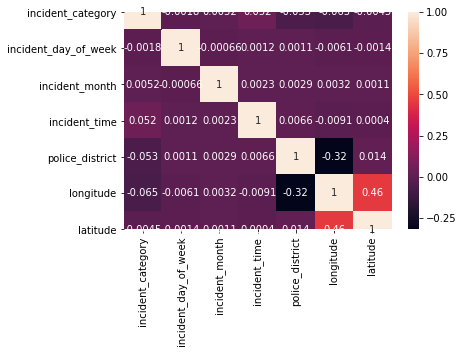

In [244]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

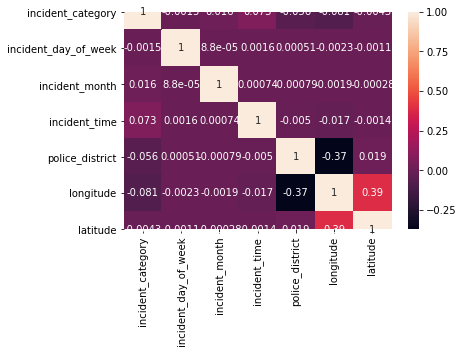

In [177]:
# sn.heatmap(corrMatrix_2, annot=True)
# plt.show()

In [245]:
first_encoded_sf_police_df['incident_category'].value_counts()

1    760417
0    214575
3    155213
2    140660
Name: incident_category, dtype: int64

In [246]:
first_encoded_sf_police_df.describe()

,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
count,1.270865e+06,1.270865e+06,1.270865e+06,1.270865e+06,1.270865e+06,1.270865e+06,1.270865e+06
mean,1.186102e+00,2.941391e+00,6.424351e+00,1.380685e+01,4.661678e+00,-1.224237e+02,3.777106e+01
std,8.563970e-01,2.009226e+00,3.455476e+00,6.601074e+00,3.203676e+00,2.925369e-02,3.567146e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.225136e+02,3.770788e+01
25%,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+01,2.000000e+00,-1.224345e+02,3.775397e+01
50%,1.000000e+00,3.000000e+00,6.000000e+00,1.500000e+01,4.000000e+00,-1.224178e+02,3.777542e+01
75%,1.000000e+00,5.000000e+00,9.000000e+00,1.900000e+01,8.000000e+00,-1.224065e+02,3.778579e+01
max,3.000000e+00,6.000000e+00,1.200000e+01,2.300000e+01,1.000000e+01,-1.205000e+02,9.000000e+01


In [247]:
# second_encoded_sf_police_df.describe()

,incident_category,incident_day_of_week,police_district,longitude,latitude
count,761482.000000,761482.000000,761482.000000,761482.000000,761482.000000
mean,1.296016,2.931452,4.526875,-122.424199,37.768441
std,1.073157,2.003610,3.221410,0.028940,0.300338
min,0.000000,0.000000,0.000000,-122.513642,37.707879
25%,0.000000,1.000000,2.000000,-122.435066,37.750505
50%,1.000000,3.000000,4.000000,-122.418120,37.774129
75%,2.000000,5.000000,8.000000,-122.406775,37.785008
max,3.000000,6.000000,10.000000,-120.500000,90.000000


In [248]:
features_names = ['incident_day_of_week', 'incident_month', 'incident_time', 'police_district', 'longitude', 'latitude']
X = first_encoded_sf_police_df[features_names]
y = first_encoded_sf_police_df['incident_category']
X

,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
6,3,4,12,8,-122.403405,37.775421
8,6,6,19,4,-122.430171,37.787439
9,5,6,1,0,-122.396010,37.747262
10,4,5,1,4,-122.421407,37.794142
12,4,9,22,0,-122.385000,37.755520
...,...,...,...,...,...,...
339062,1,1,0,3,-122.419705,37.753770
339063,1,1,0,8,-122.403028,37.787024
339067,1,1,0,1,-122.408864,37.792080
339069,1,1,0,1,-122.410057,37.788082


In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [353]:
# Create Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [251]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
print(logreg.score(X_train_scaled, y_train))
print(logreg.score(X_test_scaled, y_test))

C:\Users\flyto\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\flyto\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.598283792233735
0.5985326564206511


In [252]:
# Decision Trees Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
print(clf.score(X_train_scaled, y_train))
print(clf.score(X_test_scaled, y_test))

0.9540795343430402
0.527245945290935


In [253]:
dt2 = DecisionTreeClassifier(max_depth=4)
dt2.fit(X_train_scaled, y_train)
print(dt2.score(X_train_scaled,y_train))
print(dt2.score(X_test_scaled,y_test))

0.5985125080260358
0.5994107964005703


In [75]:
# LDA 
# Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
print(lda.score(X_train_scaled, y_train))
print(lda.score(X_test_scaled, y_test))

0.598283792233735
0.5985326564206511


In [76]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print(gnb.score(X_train_scaled, y_train))
print(gnb.score(X_test_scaled, y_test))




0.19001561142655704
0.1896908254830557


In [ ]:
# Support Vector Machine 
# from sklearn.svm import SVC

# svm = SVC()
# svm.fit(X_train_scaled, y_train)
# print(svm.score(X_train_scaled,y_train))
# print(svm.score(X_test_scaled,y_test))


In [272]:
# K-Nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier
# for k in range(1,100):
#     print("k = ",k)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train_scaled, y_train)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))

0.6004954109959838
0.5960933786986532


In [285]:
# Predicting the test set results
ypred = knn.predict(X_test_scaled)
df = pd.DataFrame({"test": y_test, "computer prediction": ypred})
#ypred

In [288]:
df[df["computer prediction"] == 0]


,test,computer prediction
634176,0,0
678447,0,0
102269,0,0
1596026,1,0
1133692,2,0
...,...,...
1114704,3,0
133788,0,0
81136,1,0
2050697,2,0


In [352]:
from sklearn.preprocessing import minmax_scale
#s = MinMaxScaler().fit([np.array(X.iloc[133788].values)])
#s.transform([np.array(X.iloc[133788].values)])

print([minmax_scale(X.iloc[10000].values)])
model.predict([minmax_scale([2,12,13,10,-122.4192417,37.779275])])



#X.iloc[133788].values
#normalized_df=(X-X.min())/(X.max()-X.min())
#normalized_df

#model.predict([minmax_scale(first_encoded_sf_police_df.iloc[133788].values)])
#scaler.fit_transform([np.float32(first_encoded_sf_police_df.iloc[133788].values)])

[array([0.77663661, 0.80160606, 0.88899915, 0.82657552, 0.        ,
       1.        ])]


array([1])

In [286]:
df['computer prediction'].value_counts()

1    309302
0      6080
3      2132
2       203
Name: computer prediction, dtype: int64

In [315]:
import pickle
# Saving the model to disk

pickle.dump(knn, open('sf_crime_model_knn.pkl', 'wb'))

In [283]:
X_test_scaled[100]

array([0.66666667, 0.36363636, 0.82608696, 0.3       , 0.04179601,
       0.00101903])

In [341]:
# Loading the model to compare the results
# incident_day_of_week	incident_month	incident_time	police_district	longitude	latitude
model = pickle.load(open('sf_crime_model_knn.pkl', 'rb'))
print(model.predict([[0.663,0.100,1,0.43,0.04,0.23]]))

[1]


C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


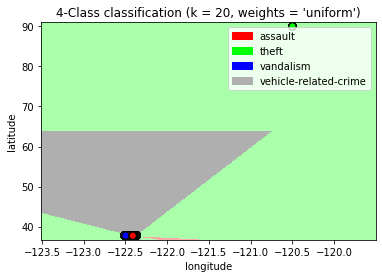

In [262]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches


X = first_encoded_sf_police_df[features_names]
y = first_encoded_sf_police_df['incident_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_crime_knn(X, y, n_neighbors, weights):
    X_mat = X[['longitude','latitude']].as_matrix()
    y_mat = y.as_matrix()
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF'])
    cmap_bold = ListedColormap(["#FF0000", "#00FF00", '#0000FF', '#AFAFAF'])
    
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat,y_mat)
    
    mesh_step_size = .01
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='assault')
    patch1 = mpatches.Patch(color='#00FF00', label='theft')
    patch2 = mpatches.Patch(color='#0000FF', label='vandalism')
    patch3 = mpatches.Patch(color='#AFAFAF', label='vehicle-related-crime')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()
    

plot_crime_knn(X_train,y_train, 20, 'uniform')

Getting score...
Getting score...


([<matplotlib.axis.XTick at 0x29f83b10b88>,
 <a list of 11 Text xticklabel objects>)

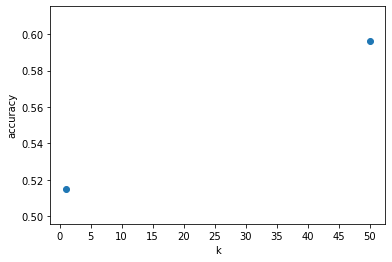

In [266]:
k_range = (1,50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    print("Getting score...")
    scores.append(knn.score(X_test_scaled, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])